<a href="https://colab.research.google.com/github/vanesaaesdr/telco-churn-app/blob/main/UAS_Bengkod_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
# 0.0 Instal dan import library dasar
!pip install seaborn streamlit joblib -q

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.1 MB/s eta 0:00:00


Load Dataset

In [ ]:
# 0.1 Load dataset (file sudah di-upload sebagai lampiran)
# Di Colab: upload manual atau simpan di /content
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**1. EDA**

1.1 Baris Pertama

In [ ]:
# 1.1.1 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1.2 Ringkasan Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.3 Statistik deskriptif untuk kolom numerik

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1.4 Persentase missing value per kolom

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
missing_pct = df.isnull().mean() * 100
print(missing_pct)
print("Jumlah missing TotalCharges:", df['TotalCharges'].isnull().sum())

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64
Jumlah missing TotalCharges: 11


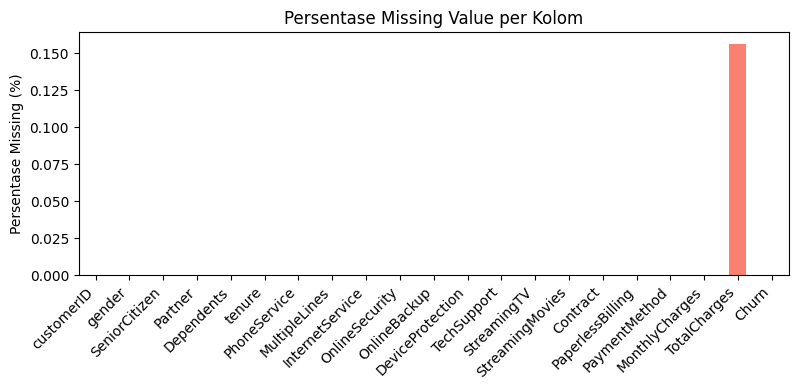

In [ ]:
plt.figure(figsize=(8,4))
missing_pct.plot(kind='bar', color='salmon')
plt.ylabel('Persentase Missing (%)')
plt.title('Persentase Missing Value per Kolom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1.5 Visualisasi distribusi target Churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


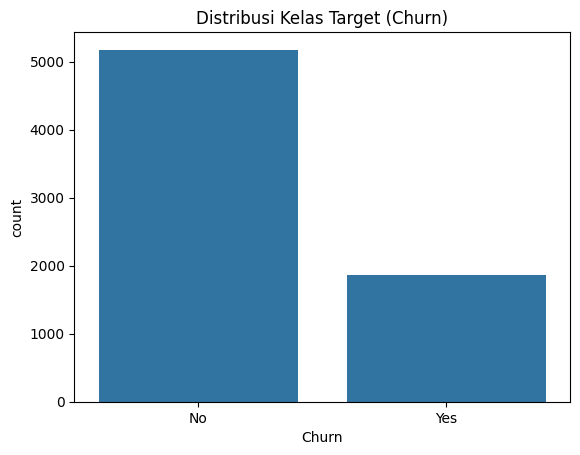

In [ ]:
# 1.3 Distribusi target
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

sns.countplot(x='Churn', data=df)
plt.title('Distribusi Kelas Target (Churn)')
plt.show()

1.6 Analisis korelasi (khusus fitur numerik)

=== 1.5 KORELASI FITUR NUMERIK ===


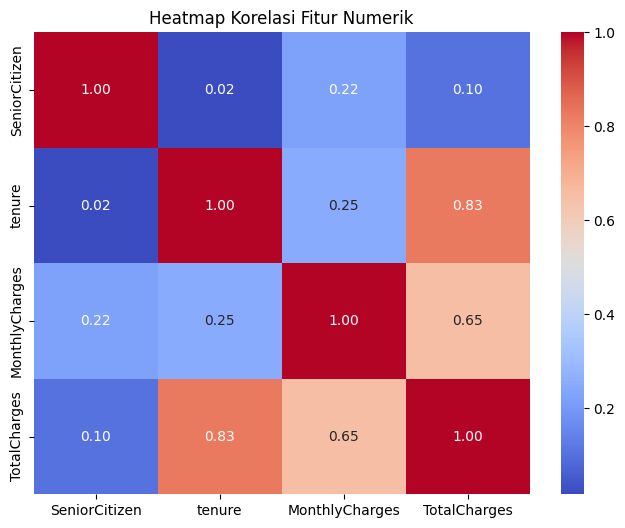

In [ ]:
print("=== 1.5 KORELASI FITUR NUMERIK ===")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

**2. Direct Modeling (tanpa preprocessing & tanpa tuning)**

In [ ]:
# [QUICK FIX] Hapus semua baris dengan NaN (sangat aman)
df_clean = df.dropna()
print(f"Dataset asli: {len(df)} baris")
print(f"Setelah dropna: {len(df_clean)} baris ({len(df)-len(df_clean)} baris dihapus)")

df = df_clean  # Update dataframe global

Dataset asli: 7043 baris
Setelah dropna: 7032 baris (11 baris dihapus)


2.1 Menyiapkan X dan y (tanpa preprocessing khusus)

In [ ]:
df_direct = df.copy()
df_direct['Churn'] = df_direct['Churn'].map({'No':0, 'Yes':1})
df_direct = df_direct.drop(columns=['customerID'])

X_direct = df_direct.drop('Churn', axis=1)
y_direct = df_direct['Churn']

# ONE-HOT ENCODING SEMUA FITUR
X_direct = pd.get_dummies(X_direct, drop_first=True)
print("Shape data direct modeling:", X_direct.shape)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_direct, y_direct, test_size=0.2, random_state=42, stratify=y_direct
)

Shape data direct modeling: (7032, 30)


2.2 Definisikan model

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42)

voting = VotingClassifier(
    estimators=[('lr', log_reg), ('knn', knn), ('svm', svm)],
    voting='soft'
)

models_direct = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Voting (LR+KNN+SVM)': voting
}

2.3 Latih model tanpa preprocessing tambahan dan tanpa tuning

In [ ]:
# [2.3] LATIH 3 MODEL (TANPA PREPROCESSING & TUNING)
for name, model in models_direct.items():
    model.fit(X_train_d, y_train_d)
    print(f"[2.3] {name} selesai dilatih")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2.3] Logistic Regression selesai dilatih
[2.3] Random Forest selesai dilatih


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2.3] Voting (LR+KNN+SVM) selesai dilatih


2.4 Evaluasi (accuracy, precision, recall, F1, confusion matrix)

=== [2.4] EVALUASI Logistic Regression ===
Accuracy : 0.8031
Precision: 0.6465
Recall   : 0.5722
F1-score : 0.6071

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



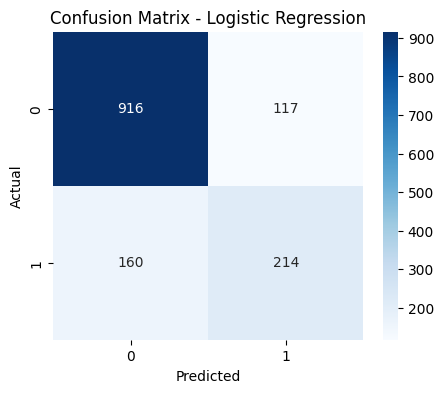

--------------------------------------------------
=== [2.4] EVALUASI Random Forest ===
Accuracy : 0.7896
Precision: 0.6258
Recall   : 0.5187
F1-score : 0.5673

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



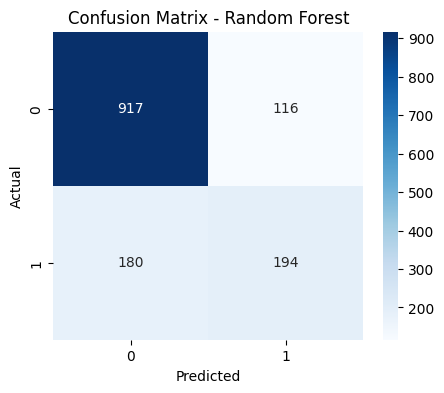

--------------------------------------------------
=== [2.4] EVALUASI Voting (LR+KNN+SVM) ===
Accuracy : 0.7783
Precision: 0.6140
Recall   : 0.4465
F1-score : 0.5170

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



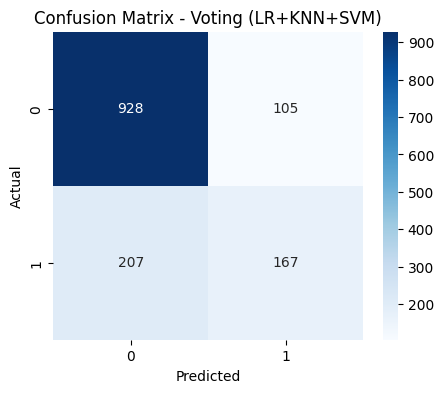

--------------------------------------------------


In [ ]:
# [2.4] FUNGSI EVALUASI MODEL
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"=== [2.4] EVALUASI {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("-" * 50)

# EVALUASI SEMUA MODEL
for name, model in models_direct.items():
    evaluate_model(name, model, X_test_d, y_test_d)

**3. Modeling dengan Preprocessing (pipeline)**

3.1 Preprocessing: missing, duplikasi, outlier, encoding, scaling

In [ ]:
# [3.1] PREPROCESSING: DUPLIKASI, OUTLIER, ENCODING, SCALING
df_prep = df.copy()

# CEK & HAPUS DUPLIKASI
print(f"[3.1] Duplikasi sebelum: {df_prep.duplicated().sum()}")
df_prep = df_prep.drop_duplicates()
print(f"[3.1] Duplikasi sesudah: {df_prep.duplicated().sum()}")

df_prep['Churn'] = df_prep['Churn'].map({'No':0, 'Yes':1})
df_prep = df_prep.drop(columns=['customerID'])

X = df_prep.drop('Churn', axis=1)
y = df_prep['Churn']

# [3.1.1] TANGANI OUTLIER (IQR CAPPING) - NUMERIK
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    X[col] = np.where(X[col] < lower, lower,
             np.where(X[col] > upper, upper, X[col]))

categorical_features = [c for c in X.columns if c not in numeric_features]

print(f"[3.1] Numeric features: {numeric_features}")
print(f"[3.1] Categorical features: {len(categorical_features)} kolom")

[3.1] Duplikasi sebelum: 0
[3.1] Duplikasi sesudah: 0
[3.1] Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
[3.1] Categorical features: 16 kolom


In [ ]:
# [3.1.2] DEFINISI PREPROCESSING PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

3.2 Train–test split (proporsi sama seperti Direct Modeling)

In [ ]:
# [3.2] TRAIN-TEST SPLIT (SAMA SEPERTI DIRECT MODELING)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import joblib

# ---- fitur Telco [file:21] ----
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# TANPA remainder
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

deploy_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

deploy_model.fit(X_train, y_train)
print("F1 deploy_model:", f1_score(y_test, deploy_model.predict(X_test)))

# simpan sebagai best_model.pkl
joblib.dump(deploy_model, "best_model.pkl")
print("saved best_model.pkl")

F1 deploy_model: 0.6099290780141844
saved best_model.pkl


In [ ]:
from google.colab import files
files.download("best_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3.3 Definisi 3 model (sama jenis)

In [ ]:
# [3.3] DEFINISI 3 MODEL DENGAN PIPELINE PREPROCESSING
log_reg_p = LogisticRegression(max_iter=1000)
rf_p = RandomForestClassifier(random_state=42)
knn_p = KNeighborsClassifier()
svm_p = SVC(probability=True, random_state=42)

voting_p = VotingClassifier(
    estimators=[('lr', log_reg_p), ('knn', knn_p), ('svm', svm_p)],
    voting='soft'
)

models_prep = {
    'Logistic Regression + Prep': Pipeline([('preprocess', preprocessor), ('model', log_reg_p)]),
    'Random Forest + Prep': Pipeline([('preprocess', preprocessor), ('model', rf_p)]),
    'Voting + Prep': Pipeline([('preprocess', preprocessor), ('model', voting_p)])
}

3.4 Pipeline: preprocessing + model, lalu training

In [ ]:
# [3.4] LATIH MODEL DENGAN PREPROCESSING
for name, pipe in models_prep.items():
    pipe.fit(X_train, y_train)
    print(f"[3.4] {name} selesai dilatih")

[3.4] Logistic Regression + Prep selesai dilatih
[3.4] Random Forest + Prep selesai dilatih
[3.4] Voting + Prep selesai dilatih


3.5 evaluasi (preprocessing)

---



=== [2.4] EVALUASI Logistic Regression + Prep ===
Accuracy : 0.8045
Precision: 0.6495
Recall   : 0.5749
F1-score : 0.6099

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



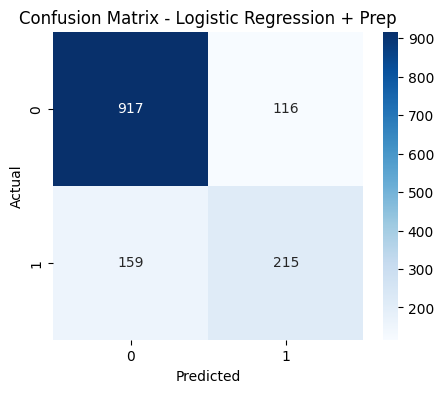

--------------------------------------------------
=== [2.4] EVALUASI Random Forest + Prep ===
Accuracy : 0.7861
Precision: 0.6197
Recall   : 0.5053
F1-score : 0.5567

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



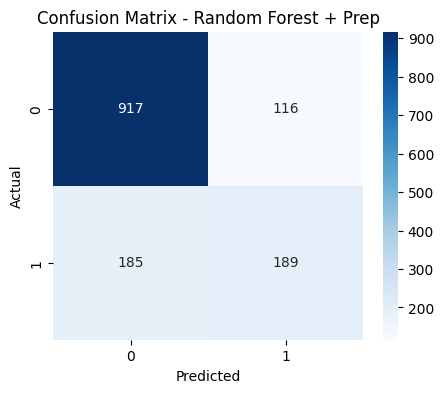

--------------------------------------------------
=== [2.4] EVALUASI Voting + Prep ===
Accuracy : 0.7925
Precision: 0.6306
Recall   : 0.5294
F1-score : 0.5756

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



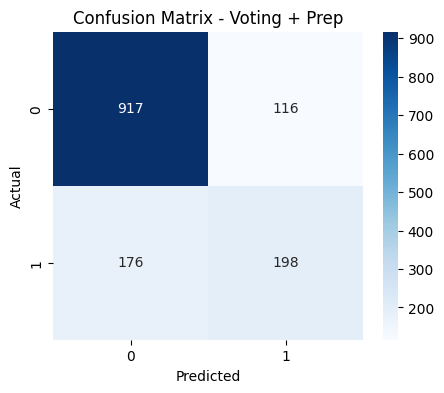

--------------------------------------------------


In [ ]:
# [3.5] EVALUASI MODEL PREPROCESSING
for name, pipe in models_prep.items():
    evaluate_model(name, pipe, X_test, y_test)

4. Hyperparameter Tuning

4.1 Parameter grid

In [ ]:
# [4.1] PARAMETER GRID UNTUK TUNING
param_grid_log = {'model__C': [0.1, 1, 10], 'model__penalty': ['l2']}
param_grid_rf = {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10]}
param_grid_voting = {'model__knn__n_neighbors': [3, 5, 7]}

 4.2 Buat pipeline khusus untuk tuning

In [ ]:
# [4.2] PIPELINE UNTUK GRIDSEARCHCV
log_pipe = Pipeline([('preprocess', preprocessor), ('model', LogisticRegression(max_iter=1000))])
rf_pipe = Pipeline([('preprocess', preprocessor), ('model', RandomForestClassifier(random_state=42))])
voting_pipe = Pipeline([('preprocess', preprocessor), ('model', VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=1000)), ('knn', KNeighborsClassifier()), ('svm', SVC(probability=True))],
    voting='soft'))])

4.3 GridSearchCV

In [ ]:
# [4.3] JALANKAN GRIDSEARCHCV (CV=3 AGAR CEPAT)
print("[4.3] HYPERPARAMETER TUNING DIMULAI...")

grid_log = GridSearchCV(log_pipe, param_grid_log, cv=3, scoring='f1', n_jobs=-1)
grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_voting = GridSearchCV(voting_pipe, param_grid_voting, cv=3, scoring='f1', n_jobs=-1)

grid_log.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_voting.fit(X_train, y_train)

print(f"[4.3] Best Logistic: {grid_log.best_params_} (score: {grid_log.best_score_:.4f})")
print(f"[4.3] Best RF     : {grid_rf.best_params_} (score: {grid_rf.best_score_:.4f})")
print(f"[4.3] Best Voting : {grid_voting.best_params_} (score: {grid_voting.best_score_:.4f})")

[4.3] HYPERPARAMETER TUNING DIMULAI...
[4.3] Best Logistic: {'model__C': 10, 'model__penalty': 'l2'} (score: 0.5977)
[4.3] Best RF     : {'model__max_depth': 10, 'model__n_estimators': 200} (score: 0.5835)
[4.3] Best Voting : {'model__knn__n_neighbors': 7} (score: 0.5834)


4.4 Evaluasi model


=== [4.4] EVALUASI MODEL TERBAIK ===
=== [2.4] EVALUASI Logistic Regression (BEST) ===
Accuracy : 0.8017
Precision: 0.6426
Recall   : 0.5722
F1-score : 0.6054

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



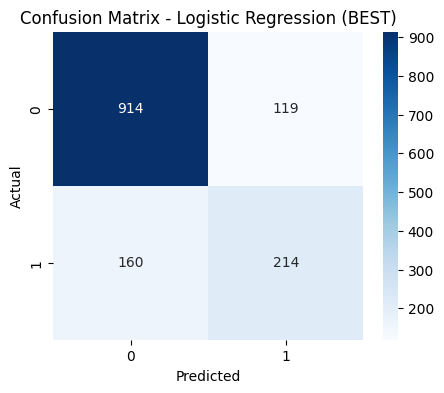

--------------------------------------------------
=== [2.4] EVALUASI Random Forest (BEST) ===
Accuracy : 0.7903
Precision: 0.6295
Recall   : 0.5134
F1-score : 0.5655

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



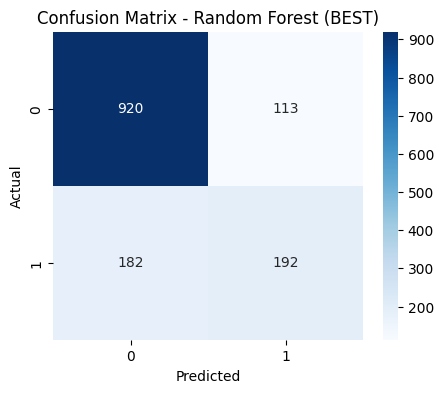

--------------------------------------------------
=== [2.4] EVALUASI Voting Classifier (BEST) ===
Accuracy : 0.7939
Precision: 0.6382
Recall   : 0.5187
F1-score : 0.5723

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



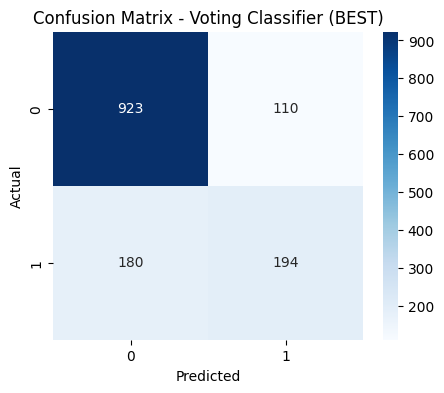

--------------------------------------------------


In [ ]:
# [4.4] EVALUASI BEST MODEL SETIAP JENIS
print("\n=== [4.4] EVALUASI MODEL TERBAIK ===")
evaluate_model("Logistic Regression (BEST)", grid_log.best_estimator_, X_test, y_test)
evaluate_model("Random Forest (BEST)", grid_rf.best_estimator_, X_test, y_test)
evaluate_model("Voting Classifier (BEST)", grid_voting.best_estimator_, X_test, y_test)